In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
#dev=pd.read_csv("dev.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33424 entries, 0 to 33423
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      33424 non-null  object
 1   category  33424 non-null  object
dtypes: object(2)
memory usage: 522.4+ KB


In [4]:
train.isnull().sum()

text        0
category    0
dtype: int64

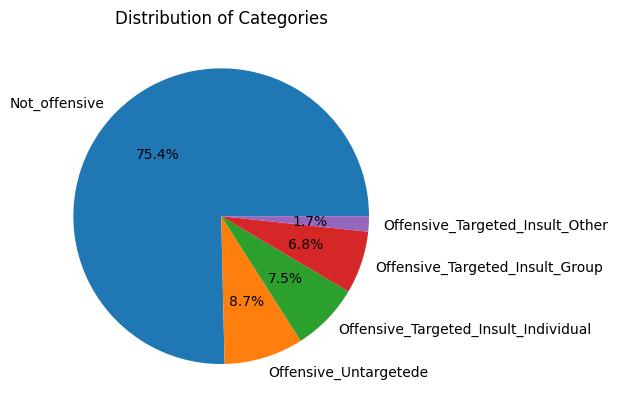

In [5]:
category_counts = test['category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.show()

In [6]:
pip install indic-nlp-library


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from indicnlp.tokenize import indic_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Define custom stop words for Tamil and English
tamil_stop_words = set([
    'ஒரு', 'என்று', 'மற்றும்', 'இந்த', 'இது', 'என்ற', 'கொண்டு', 'என்பது', 'பல', 'ஆகும்',
    'அல்லது', 'அவர்', 'நான்', 'உள்ள', 'அந்த', 'இவர்', 'என', 'முதல்', 'என்ன', 'இருந்து',
    'சில', 'என்', 'போன்ற', 'வேண்டும்', 'வந்து', 'இதன்', 'அது', 'அவன்', 'தான்', 'பலரும்',
    'என்னும்', 'மேலும்', 'பின்னர்', 'கொண்ட', 'இருக்கும்', 'தனது', 'உள்ளது', 'போது', 'என்றும்',
    'அதன்', 'தன்', 'பிறகு', 'அவர்கள்', 'வரை', 'அவள்', 'நீ', 'ஆகிய', 'இருந்தது', 'உள்ளன',
    'வந்த', 'இருந்த', 'மிகவும்', 'இங்கு', 'மீது', 'ஓர்', 'இவை', 'இந்தக்', 'பற்றி', 'வரும்',
    'வேறு', 'இரு', 'இதில்', 'போல்', 'இப்போது', 'அவரது', 'மட்டும்', 'இந்தப்', 'எனும்', 'மேல்',
    'பின்', 'சேர்ந்த', 'ஆகியோர்', 'எனக்கு', 'இன்னும்', 'அந்தப்', 'அன்று', 'ஒரே', 'மிக',
    'அங்கு', 'பல்வேறு', 'விட்டு', 'பெரும்', 'அதை', 'பற்றிய', 'உன்', 'அதிக', 'அந்தக்', 'பேர்',
    'இதனால்', 'அவை', 'அதே', 'ஏன்', 'முறை', 'யார்', 'என்பதை', 'எல்லாம்', 'மட்டுமே', 'இங்கே',
    'அங்கே', 'இடம்', 'இடத்தில்', 'அதில்', 'நாம்', 'அதற்கு', 'எனவே', 'பிற', 'சிறு', 'மற்ற',
    'விட', 'எந்த', 'எனவும்', 'எனப்படும்', 'எனினும்', 'அடுத்த', 'இதனை', 'இதை', 'கொள்ள', 'இந்தத்',
    'இதற்கு', 'அதனால்', 'தவிர', 'போல', 'வரையில்', 'சற்று', 'எனக்'
])

# Add English stop words to the set
tamil_stop_words |= ENGLISH_STOP_WORDS

# Tokenize Tamil text data and remove stop words
def tokenize_tamil(text):
    tokens = indic_tokenize.trivial_tokenize(text)
    tokens = [token for token in tokens if token not in tamil_stop_words]
    return ' '.join(tokens)


In [8]:
# Apply tokenization to the text column in train and test data
train['processed_text'] = train['text'].apply(tokenize_tamil)
test['processed_text'] = test['text'].apply(tokenize_tamil)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the preprocessed Tamil text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train = tfidf_vectorizer.fit_transform(train['processed_text'])
y_train = train['category']
X_test = tfidf_vectorizer.transform(test['processed_text'])
y_test = test['category']


In [10]:
# # # Apply SMOTE to handle class imbalance
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# X_train = X_resampled
# y_train = y_resampled

In [11]:
import pandas as pd
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
from multiprocessing import Pool

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the dataset
# df = pd.read_csv("after_nlp.csv")

# Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(df['Preprocessed Words'], df['Severity'], test_size=0.1, random_state=42)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert TF-IDF matrices to dense arrays
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Convert dense arrays to lists of strings
X_train_list = [','.join(map(str, row)) for row in X_train_dense]
X_test_list = [','.join(map(str, row)) for row in X_test_dense]

# Function to tokenize data
def tokenize_data(data):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    max_length = 512
    return tokenizer(data, padding=True, truncation=True, max_length=max_length, return_tensors='pt')

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

# Check if GPU is available and if so, move the model to GPU
device = torch.device('cuda')
model = model.to(device)

# Tokenize input data using multiprocessing
with Pool(processes=20) as pool:  # Use n processes
    X_train_tokens = pool.map(tokenize_data, X_train_list)
    X_test_tokens = pool.map(tokenize_data, X_test_list)
    
# Create DataLoader for training dataset
train_dataset = TensorDataset(X_train_tokens['input_ids'].to(device), X_train_tokens['attention_mask'].to(device), torch.tensor(y_train_encoded).to(device))
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=64)

# Define optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_dataloader) * 5  # Total number of steps (epochs * batches)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Fine-tune BERT model
model.train()
for epoch in range(10):  # Increase the number of epochs for training
    for batch in tqdm(train_dataloader):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()

# Tokenize test input data
X_test_tokens = tokenizer(X_test_list, padding=True, truncation=True, max_length=max_length, return_tensors='pt')

# Create DataLoader for test dataset
test_dataset = TensorDataset(X_test_tokens['input_ids'].to(device), X_test_tokens['attention_mask'].to(device), torch.tensor(y_test_encoded).to(device))
test_sampler = RandomSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=32)

# Evaluate on test data
model.eval()
y_pred_bert_test = []
for batch in tqdm(test_dataloader):
    input_ids, attention_mask, labels = batch
    input_ids, attention_mask = input_ids.to(device), attention_mask.to(device)
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    _, predicted = torch.max(logits, 1)
    y_pred_bert_test.extend(predicted.tolist())

# Convert predictions back to CPU and numpy
y_pred_bert_test = torch.tensor(y_pred_bert_test).to(device).cpu().numpy()

# Evaluate test predictions
accuracy_bert_test = accuracy_score(y_test_encoded[:len(y_pred_bert_test)], y_pred_bert_test)
print()
print("BERT Model Test Accuracy:", accuracy_bert_test)
print("BERT Model Test Classification Report:")c
print(classification_report(y_test_encoded[:len(y_pred_bert_test)], y_pred_bert_test))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.svm import SVC
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from indicnlp.tokenize import indic_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from imblearn.over_sampling import SMOTE


def tokenize_tamil(text):
    tokens = indic_tokenize.trivial_tokenize(text)
    tokens = [token for token in tokens if token not in tamil_stop_words]
    return ' '.join(tokens)

print("Hello")

# Apply tokenization to the text column in train and test data
train['processed_text'] = train['text'].apply(tokenize_tamil)
test['processed_text'] = test['text'].apply(tokenize_tamil)

print("Hello")

# Vectorize the preprocessed Tamil text data for train and test data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train = tfidf_vectorizer.fit_transform(train['processed_text'])
y_train = train['category']
X_test = tfidf_vectorizer.transform(test['processed_text'])
y_test = test['category']

print("Hello")

# Apply SMOTE to handle class imbalance on the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Hello")

# Define base classifiers for stacking
base_classifiers = [
    ('rf', RandomForestClassifier()),
    ('svm', SVC(kernel='linear', probability=True))
]

# Initialize stacking classifier
clf = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=LogisticRegression(),
    stack_method='auto',
    cv=4
)

print("Hello")

# Train the stacking classifier
clf.fit(X_train_resampled, y_train_resampled)

print("Hello")

# Evaluate the model on the testing data
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy =76

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import numpy as np

# Assuming you have separate DataFrames 'train' and 'test' with columns 'text' and 'category'

# Encode categorical labels
encoder = LabelEncoder()
train['category_encoded'] = encoder.fit_transform(train['category'])
test['category_encoded'] = encoder.transform(test['category'])

# Tokenize and pad sequences for LSTM
max_words = 1000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train['text'])
X_train_seq = tokenizer.texts_to_sequences(train['text'])
X_test_seq = tokenizer.texts_to_sequences(test['text'])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert categorical labels to one-hot encoding
y_train = to_categorical(train['category_encoded'])
y_test = to_categorical(test['category_encoded'])

# Define the LSTM model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Train the model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stop])

# Evaluate the model on the testing data
y_pred_prob = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)
print(classification_report(np.argmax(y_test, axis=1), y_pred))


In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import numpy as np

# Assuming you have separate DataFrames 'train' and 'test' with columns 'text' and 'category'

# Encode categorical labels
encoder = LabelEncoder()
train['category_encoded'] = encoder.fit_transform(train['category'])
test['category_encoded'] = encoder.transform(test['category'])

# Tokenize and pad sequences for LSTM
max_words = 10000  # Increased max_words
max_len = 150  # Increased max_len
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train['text'])
X_train_seq = tokenizer.texts_to_sequences(train['text'])
X_test_seq = tokenizer.texts_to_sequences(test['text'])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert categorical labels to one-hot encoding
y_train = to_categorical(train['category_encoded'])
y_test = to_categorical(test['category_encoded'])

# Define the LSTM model with Bidirectional layer
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))  # Bidirectional LSTM layer
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Train the model
history = model.fit(X_train_pad, y_train, epochs=20, batch_size=128, validation_split=0.1, callbacks=[early_stop])

# Evaluate the model on the testing data
y_pred_prob = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)
print(classification_report(np.argmax(y_test, axis=1), y_pred))
